In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("DT.csv")
df.head()

,#,Age,Has_job,Own_House,Credit_Rating,Class
0,1,Young,False,False,fair,No
1,2,Young,False,False,good,No
2,3,Young,True,False,good,yes
3,4,Young,True,True,fair,yes
4,5,Young,False,False,fair,No


In [2]:
x = df.iloc[:,[0,1,2,3]].values

y = df.iloc[:,-1].values


In [3]:
x

array([[1, 'Young', False, False],
       [2, 'Young', False, False],
       [3, 'Young', True, False],
       [4, 'Young', True, True],
       [5, 'Young', False, False],
       [6, 'Middle', False, False],
       [7, 'Middle', False, False],
       [8, 'Middle', True, True],
       [9, 'Middle', False, True],
       [10, 'Middle', False, True],
       [11, 'Old', False, True],
       [12, 'Old', False, True],
       [13, 'Old', True, False],
       [14, 'Old', True, False],
       [15, 'Old', False, False]], dtype=object)

In [4]:
y

array(['No', 'No', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'No'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

x[:,0] = le.fit_transform(x[:,0])

x[:,1] = le.fit_transform(x[:,1])

x[:,2] = le.fit_transform(x[:,2])

x[:,3] = le.fit_transform(x[:,3])
x

array([[0, 2, 0, 0],
       [1, 2, 0, 0],
       [2, 2, 1, 0],
       [3, 2, 1, 1],
       [4, 2, 0, 0],
       [5, 0, 0, 0],
       [6, 0, 0, 0],
       [7, 0, 1, 1],
       [8, 0, 0, 1],
       [9, 0, 0, 1],
       [10, 1, 0, 1],
       [11, 1, 0, 1],
       [12, 1, 1, 0],
       [13, 1, 1, 0],
       [14, 1, 0, 0]], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

y_pred

print("Confusion·Matrix:·",metrics.confusion_matrix(y_test,y_pred))

print("Accuracy·:·",metrics.accuracy_score(y_test,y_pred)*100)

print("Report : ",metrics.classification_report(y_test, y_pred))

pred=[[2,1,0,1],

[1,0,1,1],

[1,0,0,1],

[8, 0, 0, 1],

[2,1,0,1]]

y_pred = clf.predict(pred)

y_pred

Confusion·Matrix:· [[1 0]
 [2 2]]
Accuracy·:· 60.0
Report :                precision    recall  f1-score   support

          No       0.33      1.00      0.50         1
         yes       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



array(['No', 'No', 'No', 'yes', 'No'], dtype=object)

In [9]:
pip install pydot

In [10]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Has_job', 'Own_House', 'Credit_Rating', 'Class']

In [12]:
pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67328 sha256=1e2186d8d6901b22d131e1bddeb1728fdbaef01e3ee7a41e0cd588c8a88a0d82
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5e\a3\41\bd1e111f574fbc61587c888b2038720833498add2a939ceab6
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [13]:
from dtreeviz.trees import dtreeviz 
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt

In [18]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Class'.
df['Class']= label_encoder.fit_transform(df['Class'])
df['Age']= label_encoder.fit_transform(df['Age'])
df['Has_job']= label_encoder.fit_transform(df['Has_job'])
df['Own_House']= label_encoder.fit_transform(df['Own_House'])
df['Credit_Rating']= label_encoder.fit_transform(df['Credit_Rating'])
  
df['Class'].unique()

array([0, 1])

In [19]:
feature_cols = ['Age', 'Has_job', 'Own_House', 'Credit_Rating']
X = df[feature_cols] # Features
y = df.Class # Target variable
print(y)

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
Name: Class, dtype: int32


In [20]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [21]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- value: [0.00]
|   |--- feature_1 >  0.50
|   |   |--- value: [1.00]
|--- feature_2 >  0.50
|   |--- value: [1.00]



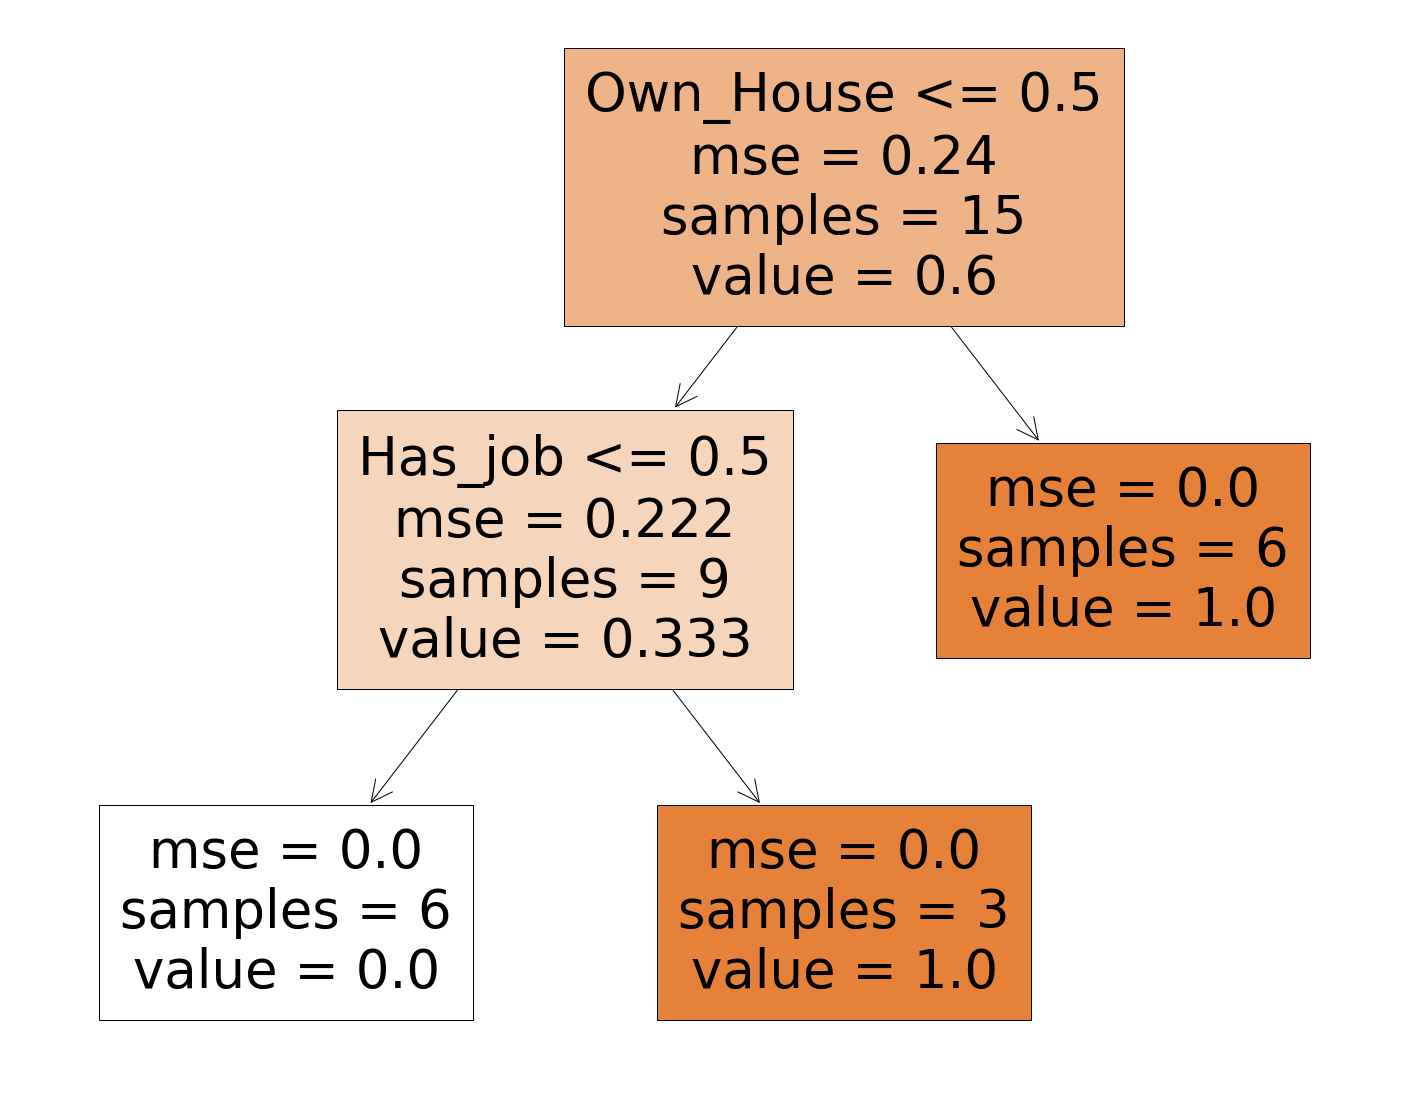

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=feature_cols, filled=True)